Import necessary libraries and loading the dataset

In [32]:

import pandas as pd
import matplotlib.pyplot as plt

file_path = '/Users/jameschen/Downloads/olympics_08_medalists.csv'
df = pd.read_csv(file_path)

Identifying missing value and drop rows where all values are missing

In [33]:
print(df.isnull().sum())
df.dropna(how='all', inplace=True)

medalist_name                    0
male_archery                  1864
female_archery                1866
male_athletics                1790
female_athletics              1794
                              ... 
male_weightlifting            1851
female_weightlifting          1854
male_freestyle wrestling      1847
female_freestyle wrestling    1859
male_greco-roman wrestling    1848
Length: 71, dtype: int64


Melting data to transform it into a tidy format

In [34]:
id_vars = ['medalist_name']
value_vars = [col for col in df.columns if col not in id_vars]
df_melted = df.melt(id_vars=id_vars, value_vars=value_vars, var_name='Category', value_name='Medal')


Splitting Cateogry column to extract Gender and Sport. Then drop rows where Gender or Sport is NA. Drop the original cateogry column for the newest cleaned dataset. 

In [35]:

split_cols = df_melted['Category'].str.split('_', n=1, expand=True)
df_melted['Gender'] = split_cols[0]
df_melted['Sport'] = split_cols[1]
df_melted.dropna(subset=['Gender', 'Sport'], inplace=True)
df_melted.drop(columns=['Category'], inplace=True)
print(df_melted.head())

       medalist_name Medal Gender    Sport
0    Aaron Armstrong   NaN   male  archery
1      Aaron Peirsol   NaN   male  archery
2   Abdullo Tangriev   NaN   male  archery
3  Abeer Abdelrahman   NaN   male  archery
4            Abhinav   NaN   male  archery


Creating Pivot Tables for medal count

In [36]:
medal_count = df_melted.pivot_table(index='Sport', columns='Gender', values='Medal', aggfunc='count', fill_value=0)

print("Pivot Table (medal_count):")
print(medal_count)

print("Sum of medal_count by gender:")
print(medal_count.sum())

Pivot Table (medal_count):
Gender                 female  male
Sport                              
archery                     9    11
artistic gymnastics        20    29
association football       54    55
athletics                  81    85
badminton                  10    12
baseball                    0    72
basketball                 36    35
beach volleyball            6     6
bmx                         3     3
boxing                      0    44
canoeing and kayaking      21    53
diving                     13    16
equestrian sport           20    18
fencing                    26    28
field hockey               48    50
freestyle wrestling        16    28
greco-roman wrestling       0    27
handball                   42    43
judo                       28    28
modern pentathlon           2     3
mountain biking             3     3
rhythmic gymnastics        21     0
road bicycle racing         6     5
rowing                     58    83
sailing                    21    33
s

Visualizations: One compares the medals earned in different sports by gender. Another shows the cumulative medals earned by sport

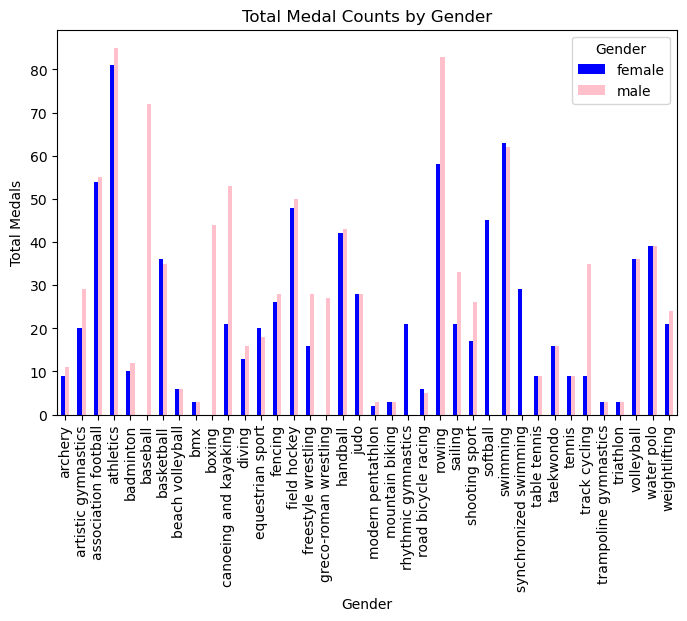

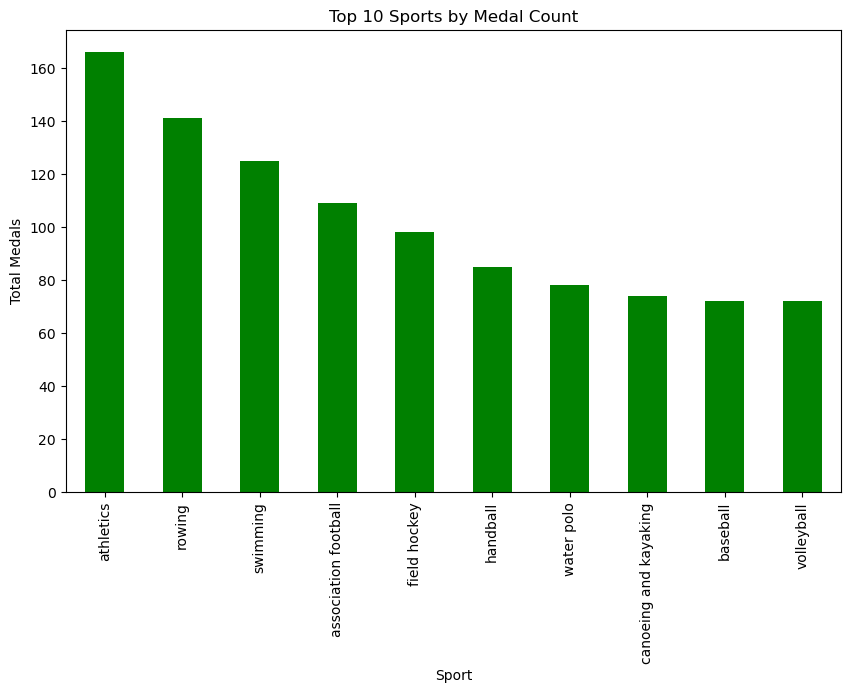

In [37]:
medal_count.plot(kind='bar', figsize=(8, 5), color=['blue', 'pink'])
plt.title("Total Medal Counts by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Medals")
plt.show()

df_melted = df_melted[df_melted['Medal'].notna()]

medal_count_sport = df_melted.groupby('Sport')['Medal'].count().sort_values(ascending=False).head(10)

medal_count_sport.plot(kind='bar', figsize=(10, 6), color='green')
plt.title("Top 10 Sports by Medal Count")
plt.xlabel("Sport")
plt.ylabel("Total Medals")
plt.show()